Work made by Huang Pascal and Nicot Quentin 

# Highwayenv case : roundabout

### Download : https://github.com/eleurent/highway-env/tree/master/scripts
### Doc : https://highway-env.readthedocs.io/en/latest/

# Installation

In [1]:
!pip install highway-env==1.5

# Environment
import gym
import highway_env

# Visualization utils
%load_ext tensorboard
import sys
from tqdm.notebook import trange
!pip install tensorboardx gym pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg
!git clone https://github.com/eleurent/highway-env.git 2> /dev/null
sys.path.insert(0, '/content/highway-env/scripts/')
from utils import record_videos, show_videos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 48.7 MB/s eta 0:00:00


/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 KB 4.1 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  libgle3
The following NEW packages will be installed:
  freeglut3 python-opengl xvfb
0 upgraded, 3 newly installed, 0 to remove and 21 not upgraded.
Need to get 1,355 kB of archives.
After this operation, 8,005 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 freeglut3 amd64 2.8.1-3 [73.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/univ

In [2]:
import gym
from matplotlib import pyplot as plt
%matplotlib inline

# Creating the roundabout environment

In [3]:
env = gym.make('merge-v0')
import pprint
pprint.pprint(env.config)

{'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'high_speed_reward': 0.2,
 'lane_change_reward': -0.05,
 'manual_control': False,
 'merging_speed_reward': -0.5,
 'observation': {'type': 'Kinematics'},
 'offscreen_rendering': False,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 15}


/usr/local/lib/python3.8/dist-packages/highway_env/vehicle/objects.py:33: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.position = np.array(position, dtype=np.float)
/usr/local/lib/python3.8/dist-packages/highway_env/vehicle/controller.py:273: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guid

In [4]:
import os

os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'

import pygame
pygame.display.set_mode((600,600))

<Surface(600x600x32 SW)>

/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https:/

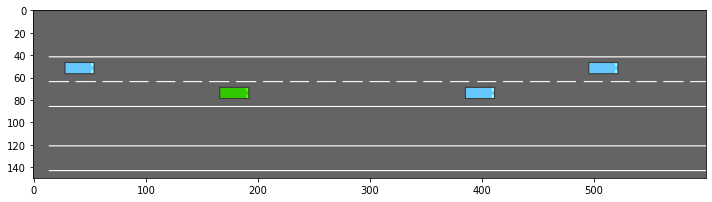

In [5]:
env.reset()
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
plt.imshow(env.render(mode="rgb_array"))


As we can see, the agent (green car) need to cross this roundabout from the south entry to the north entry. It needs to avoid collision and to stay on the road.

# Let's train the model 

# Tensorbord show the perfomance of the model

In [6]:
%tensorboard --logdir "highway_dqn/"

<IPython.core.display.Javascript object>

In [7]:
!pip install git+https://github.com/DLR-RM/stable-baselines3

# Agent
from stable_baselines3 import DQN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/DLR-RM/stable-baselines3 to /tmp/pip-req-build-9v7qvild
  Running command git clone --filter=blob:none --quiet https://github.com/DLR-RM/stable-baselines3 /tmp/pip-req-build-9v7qvild
  Resolved https://github.com/DLR-RM/stable-baselines3 to commit 6b8905acdb27e7b2acd036efc918818cc7ee3e20
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stable-baselines3: filename=stable_baselines3-1.7.0-py3-none-any.whl size=171861 sha256=e7b70be7cf3fc85c91339fafefd5450c26c927ae681043f78d2bbf42895f97db
  Stored in directory: /tmp/pip-ephem-wheel-cache-nbnpwoia/wheels/90/4e/06/447116d15ce3af2647603a9b5c7c14b5148fd800bba16e38d9
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616823 sha256=0c8f06f20e145b4ea97216e1212da9a00491c6eec

In [8]:
model = DQN('MlpPolicy', "merge-v0",
                policy_kwargs=dict(net_arch=[256, 256]),
                learning_rate=5e-4,
                buffer_size=15000,
                learning_starts=200,
                batch_size=32,
                gamma=0.8,
                train_freq=1,
                gradient_steps=1,
                target_update_interval=50,
                exploration_fraction=0.7,
                verbose=1,
                tensorboard_log="highway_dqn/")

Using cuda device
Creating environment from the given name 'merge-v0'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.8/dist-packages/highway_env/vehicle/objects.py:33: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.position = np.array(position, dtype=np.float)
/usr/local/lib/python3.8/dist-packages/highway_env/vehicle/controller.py:273: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guid

In [9]:
from stable_baselines3.common.evaluation import evaluate_policy
env = gym.make("merge-v0")
# Evaluate the trained agent
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

/usr/local/lib/python3.8/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.re

mean_reward:10.75 +/- 0.00


In [10]:
model.learn(total_timesteps=int(2e4))

Logging to highway_dqn/DQN_1


/usr/local/lib/python3.8/dist-packages/highway_env/vehicle/controller.py:273: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.int(np.clip(np.round(x * (self.target_speeds.size - 1)), 0, self.target_speeds.size - 1))
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/usr/local/lib/python3.8/dist-packages/highway_env/vehi

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0593   |
|    n_updates        | 2555     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 10.9     |
|    exploration_rate | 0.81     |
| time/               |          |
|    episodes         | 224      |
|    fps              | 23       |
|    time_elapsed     | 119      |
|    total_timesteps  | 2804     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0865   |
|    n_updates        | 2603     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 10.9     |
|    exploration_rate | 0.806    |
| time/               |          |
|    episode

In [11]:
env = record_videos(env)

for episode in trange(3, desc="Test episodes"):
    obs, done = env.reset(), False
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(int(action))
env.close()
show_videos()

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Test episodes:   0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py:67: DeprecationWarning: WARN: `env.metadata["render.modes"] is marked as deprecated and will be replaced with `env.metadata["render_modes"]` see https://github.com/openai/gym/pull/2654 for more details
  required_ext = ".json" if self.ansi_mode else ".mp4"
/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment merge-v0 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  self.path = path
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:280: UserWarning: WARN: No render modes was dec

In [12]:
# Evaluate the trained agent
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

/usr/local/lib/python3.8/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/highway_env/vehicle/objects.py:33: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.position = np.array(position, dtype=np.float)
/usr/local/lib/python3.8/dist-packages/gym/wrappers/monitoring/video_recorder.py:67: DeprecationWarning: WARN: `env.metadata["render.modes"] is marked

mean_reward:11.47 +/- 0.00
